In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

We have to predict he price of the bag depending on the breand, material,style, compartments, is there any laptop compartments, is it waterproof or not, style, color and weight capacity.

The problem is regression type.

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head(5)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [5]:
data.duplicated().sum()

0

No duplicates are available so we can remove the id features

In [6]:
data.drop('id',axis=1,inplace=True)

In [7]:
data.head(2)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 22.9+ MB


In [9]:
data.describe()

,Compartments,Weight Capacity (kg),Price
count,300000.000000,299862.000000,300000.000000
mean,5.443590,18.029994,81.411107
std,2.890766,6.966914,39.039340
min,1.000000,5.000000,15.000000
25%,3.000000,12.097867,47.384620
50%,5.000000,18.068614,80.956120
75%,8.000000,24.002375,115.018160
max,10.000000,30.000000,150.000000


For the feature brand

In [10]:
data['Brand'].unique()

array(['Jansport', 'Under Armour', 'Nike', 'Adidas', 'Puma', nan],
      dtype=object)

In [11]:
data['Brand'].isnull().sum()

9705

In [12]:
data['Brand'].value_counts()

Brand
Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
Name: count, dtype: int64

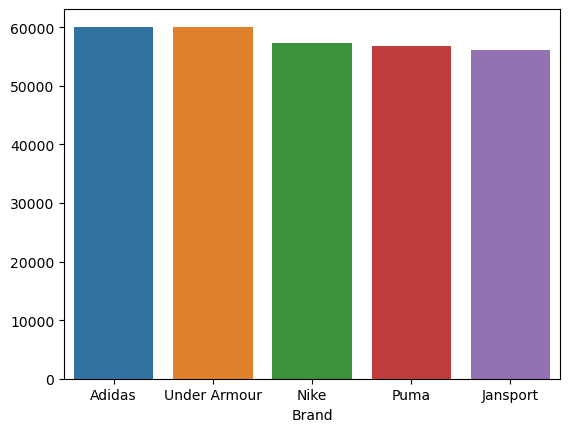

In [13]:
brand_counts=data['Brand'].value_counts()
sns.barplot(x=brand_counts.index,y=brand_counts.values)
plt.show()

Adidas is most frequent

For the null values we can specify it in other section

In [14]:
def change_brand(df):
    df['Brand'].fillna('Other',inplace=True)
    df['Brand']=df['Brand'].map({'Jansport':0, 'Under Armour':1, 'Nike':2, 'Adidas':3, 'Puma':4,'Other':5}).values

In [15]:
change_brand(data)

In [16]:
data['Brand'].isnull().sum()

0

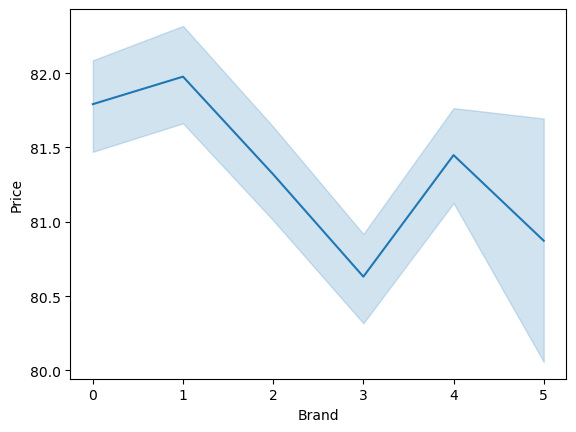

In [17]:
sns.lineplot(x=data['Brand'],y=data['Price'])
plt.show()

For 'under armour' brand the price of the bag is high  while the brand of 'adidas' have lowest price

In [18]:
data.head(2)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,0,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056


For material

In [19]:
data['Material'].unique()

array(['Leather', 'Canvas', 'Nylon', nan, 'Polyester'], dtype=object)

In [20]:
data['Material'].isnull().sum()

8347

In [21]:
data['Material'].value_counts()

Material
Polyester    79630
Leather      73416
Nylon        70603
Canvas       68004
Name: count, dtype: int64

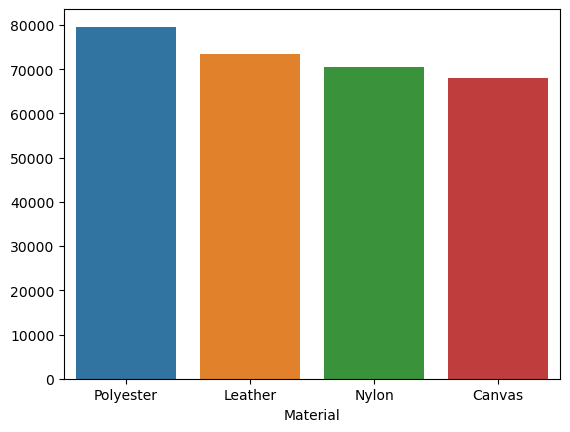

In [22]:
material_counts=data['Material'].value_counts()
sns.barplot(x=material_counts.index,y=material_counts.values)
plt.show()

Majorly the material is made up of polyester

For the nan values we are using other section

In [23]:
def change_material(df):
    df['Material'].fillna('Other',inplace=True)
    df['Material']=df['Material'].map({'Leather':0, 'Canvas':1, 'Nylon':2, 'Polyester':3,'Other':4}).values

In [24]:
change_material(data)

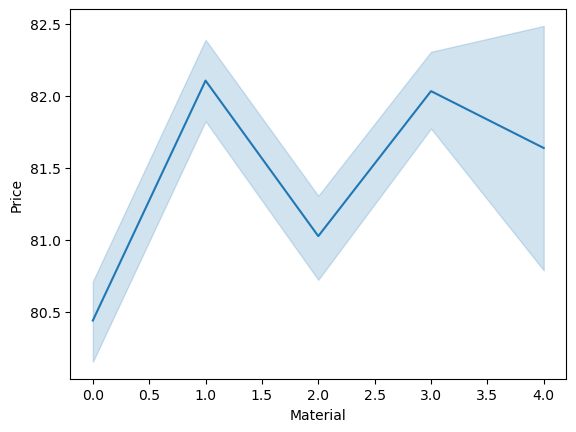

In [25]:
sns.lineplot(x=data['Material'],y=data['Price'])
plt.show()

The bag with canvas material have high value but the price of leather bag is low

In [26]:
data.head(2)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,0,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,0,1,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056


For size feature

In [27]:
data['Size'].unique()

array(['Medium', 'Small', 'Large', nan], dtype=object)

In [28]:
data['Size'].value_counts()

Size
Medium    101906
Large      98643
Small      92856
Name: count, dtype: int64

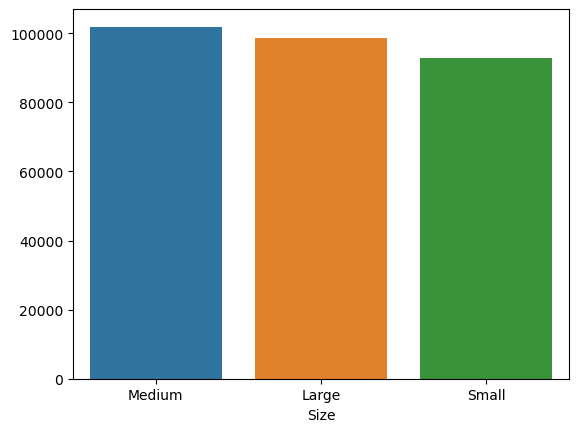

In [29]:
size_counts=data['Size'].value_counts()
sns.barplot(x=size_counts.index, y=size_counts.values)
plt.show()

Medium size is most abundant in dataset

In [30]:
def change_size(df):
    df['Size'].fillna("Medium",inplace=True)
    df['Size']=df['Size'].map({'Medium':0, 'Small':1, 'Large':2}).values

In [31]:
change_size(data)

In [32]:
data['Size'].isnull().sum()

0

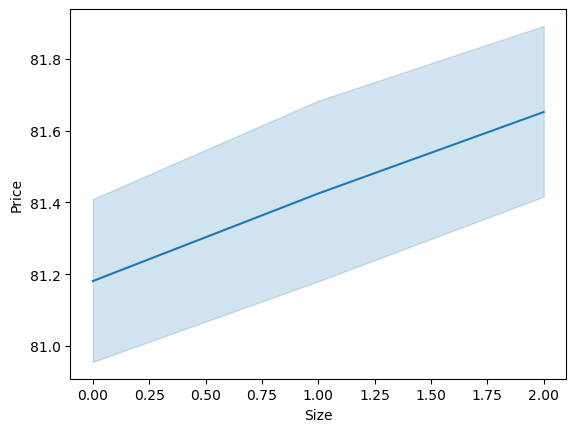

In [33]:
sns.lineplot(x=data['Size'],y=data['Price'])
plt.show()

The price of large bags are most while the small bags have low price

In [34]:
data.head(2)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,0,0,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,0,1,1,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056


For compartments feature

In [35]:
data['Compartments'].unique()

array([ 7., 10.,  2.,  8.,  1.,  3.,  5.,  9.,  6.,  4.])

In [36]:
data['Compartments'].describe()

count    300000.000000
mean          5.443590
std           2.890766
min           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          10.000000
Name: Compartments, dtype: float64

The median of data is 5.00

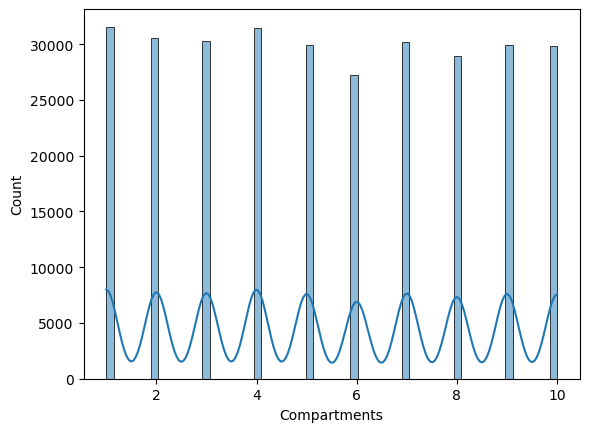

In [37]:
sns.histplot(data['Compartments'],kde=True)
plt.show()

The count of 4 is the most

In [38]:
def change_compartments(df):
    df['Compartments'].fillna(5.0,inplace=True)

In [39]:
change_compartments(data)

In [40]:
data['Compartments'].isnull().sum()

0

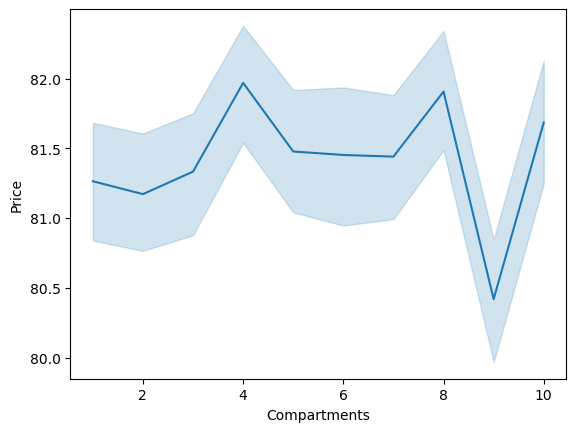

In [41]:
sns.lineplot(x=data['Compartments'],y=data['Price'])
plt.show()

The price of the 4 and 8 compartments are higher while 9 compartment price is low

In [42]:
data.head(2)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,0,0,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,0,1,1,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056


For laptop compartments features

In [43]:
data['Laptop Compartment'].unique()

array(['Yes', 'No', nan], dtype=object)

In [44]:
data['Laptop Compartment'].value_counts()

Laptop Compartment
Yes    148342
No     144214
Name: count, dtype: int64

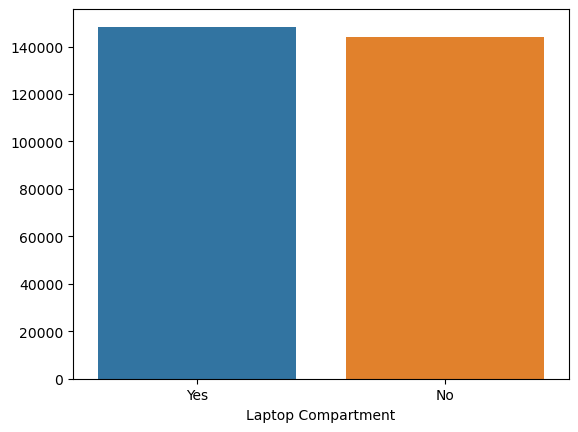

In [45]:
laptop_counts=data['Laptop Compartment'].value_counts()
sns.barplot(x=laptop_counts.index, y=laptop_counts.values)
plt.show()

Most have laptop compartments but for the non specified we should use no as yes can affect negatively

In [46]:
def change_laptop(df):
    df['Laptop Compartment'].fillna("No",inplace=True)
    df['Laptop Compartment']=df['Laptop Compartment'].map({'No':0,'Yes':1}).values

In [47]:
change_laptop(data)

In [48]:
data['Laptop Compartment'].isnull().sum()

0

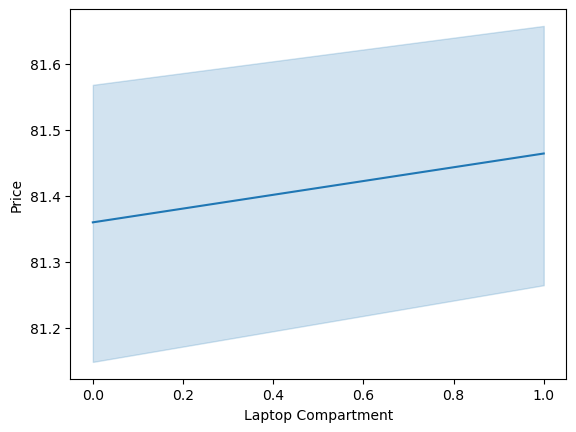

In [49]:
sns.lineplot(x=data['Laptop Compartment'],y=data['Price'])
plt.show()

The price of bag with laptop compartments are high but not that much difference is there

In [50]:
data.head(2)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,0,0,7.0,1,No,Tote,Black,11.611723,112.15875
1,0,1,1,10.0,1,Yes,Messenger,Green,27.078537,68.88056


For waterproof feature

In [51]:
data['Waterproof'].unique()

array(['No', 'Yes', nan], dtype=object)

In [52]:
data['Waterproof'].value_counts()

Waterproof
Yes    148077
No     144873
Name: count, dtype: int64

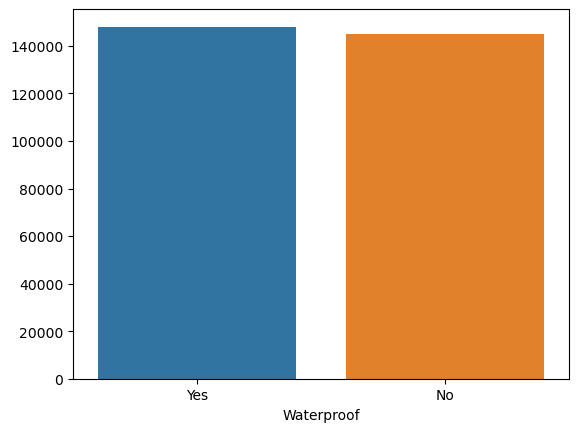

In [53]:
waterproof_counts=data['Waterproof'].value_counts()
sns.barplot(x=waterproof_counts.index,y=waterproof_counts.values)
plt.show()

The yes have major count  but for non-specified we are going with no

In [54]:
def change_waterproof(df):
    df['Waterproof'].fillna("No",inplace=True)
    df['Waterproof']=df['Waterproof'].map({"No":0,"Yes":1}).values

In [55]:
change_waterproof(data)

In [56]:
data['Waterproof'].isnull().sum()

0

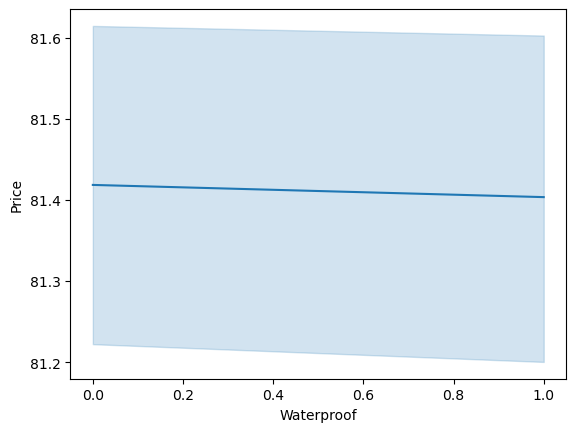

In [57]:
sns.lineplot(x=data['Waterproof'],y=data['Price'])
plt.show()

There is decrease in price of the waterproof bags little much

In [58]:
data.head(2)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,0,0,7.0,1,0,Tote,Black,11.611723,112.15875
1,0,1,1,10.0,1,1,Messenger,Green,27.078537,68.88056


For style feature

In [59]:
data['Style'].unique()

array(['Tote', 'Messenger', nan, 'Backpack'], dtype=object)

In [60]:
data['Style'].isnull().sum()

7970

In [61]:
data['Style'].value_counts()

Style
Messenger    100031
Tote          97438
Backpack      94561
Name: count, dtype: int64

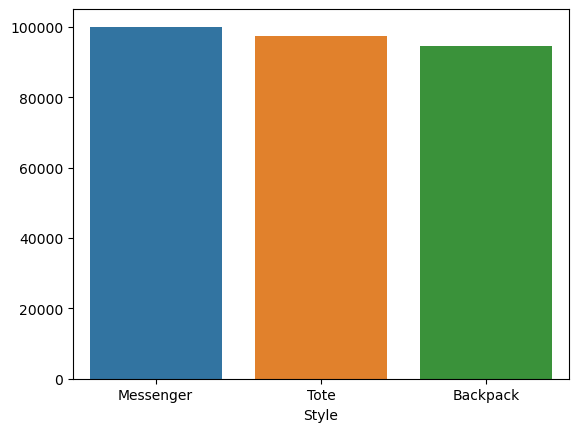

In [62]:
style_counts=data['Style'].value_counts()
sns.barplot(x=style_counts.index, y=style_counts.values)
plt.show()

Messenger is highly abundant in the dataset

For nan we are using other section

In [63]:
def change_style(df):
    df['Style'].fillna("Other",inplace=True)
    df['Style']=df['Style'].map({'Tote':0, 'Messenger':1, 'Backpack':2,'Other':3}).values

In [64]:
change_style(data)

In [65]:
data['Style'].isnull().sum()

0

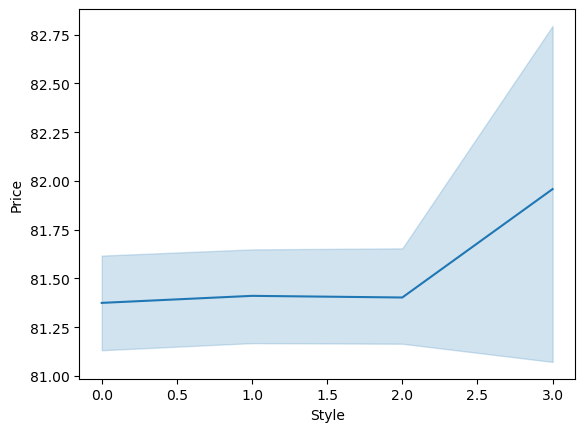

In [66]:
sns.lineplot(x=data['Style'], y=data['Price'])
plt.show()

For other style the price is high

In [67]:
data.head(2)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,0,0,7.0,1,0,0,Black,11.611723,112.15875
1,0,1,1,10.0,1,1,1,Green,27.078537,68.88056


For color feature

In [68]:
data['Color'].unique()

array(['Black', 'Green', 'Red', 'Blue', 'Gray', 'Pink', nan], dtype=object)

In [69]:
data['Color'].value_counts()

Color
Pink     51690
Gray     50280
Blue     48097
Red      47219
Green    46386
Black    46378
Name: count, dtype: int64

In [70]:
data['Color'].isnull().sum()

9950

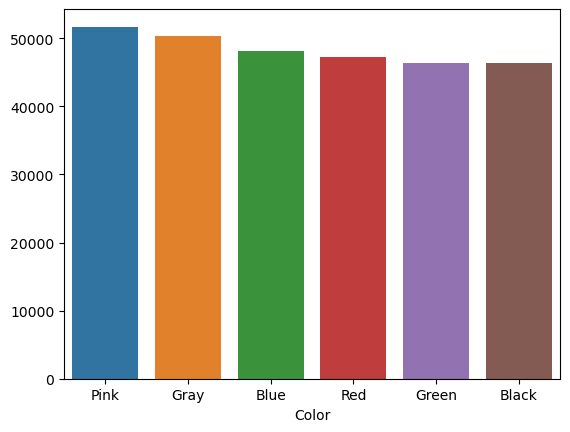

In [71]:
color_counts=data['Color'].value_counts()
sns.barplot(x=color_counts.index,y=color_counts.values)
plt.show()

The pink color is abundant

For nan values wea re using other section

In [72]:
def change_color(df):
    df['Color'].fillna("Other",inplace=True)
    df['Color']=df['Color'].map({'Black':0, 'Green':1, 'Red':2, 'Blue':3, 'Gray':4, 'Pink':5, 'Other':6}).values

In [73]:
change_color(data)

In [74]:
data['Color'].isnull().sum()

0

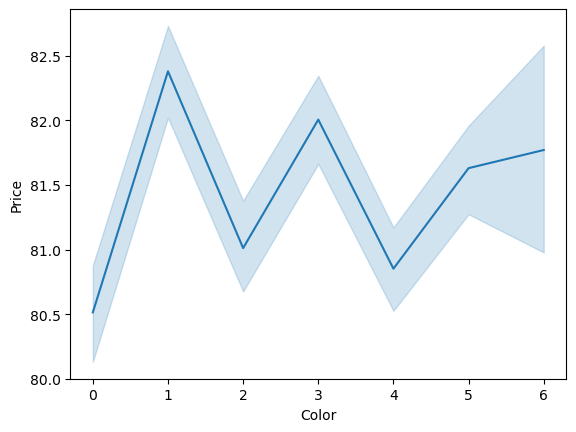

In [75]:
sns.lineplot(x=data['Color'],y=data['Price'])
plt.show()

The price of green color is high

In [76]:
data.head(2)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,0,0,7.0,1,0,0,0,11.611723,112.15875
1,0,1,1,10.0,1,1,1,1,27.078537,68.88056


For weight capacity feature

In [77]:
data['Weight Capacity (kg)'].unique()

array([11.61172281, 27.07853658, 16.64375995, ...,  9.55993494,
       26.63318223,  6.1757379 ])

In [78]:
data['Weight Capacity (kg)'].describe()

count    299862.000000
mean         18.029994
std           6.966914
min           5.000000
25%          12.097867
50%          18.068614
75%          24.002375
max          30.000000
Name: Weight Capacity (kg), dtype: float64

The mean and median is approx same which is 18.0

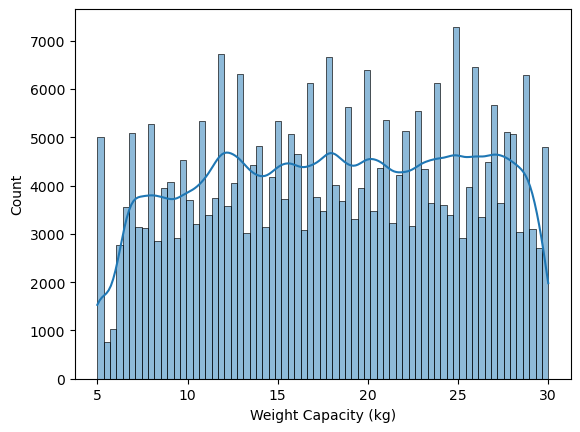

In [79]:
sns.histplot(data['Weight Capacity (kg)'],kde=True)
plt.show()

In [80]:
data['Weight Capacity (kg)'].isnull().sum()

138

In [81]:
mini_weight=data['Weight Capacity (kg)'].min()
maxi_weight=data['Weight Capacity (kg)'].max()
def scale_weight(x):
    return (x-mini_weight)/(maxi_weight-mini_weight)
def change_weight(df):
    df['Weight Capacity (kg)']=df['Weight Capacity (kg)'].apply(scale_weight)
    df['Weight Capacity (kg)'].fillna(18.0,inplace=True)

In [82]:
data['Weight Capacity (kg)'].describe()

count    299862.000000
mean         18.029994
std           6.966914
min           5.000000
25%          12.097867
50%          18.068614
75%          24.002375
max          30.000000
Name: Weight Capacity (kg), dtype: float64

In [83]:
change_weight(data)

In [84]:
data['Weight Capacity (kg)'].isnull().sum()

0

In [85]:
data.head(2)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,0,0,7.0,1,0,0,0,0.264469,112.15875
1,0,1,1,10.0,1,1,1,1,0.883141,68.88056


For price feature

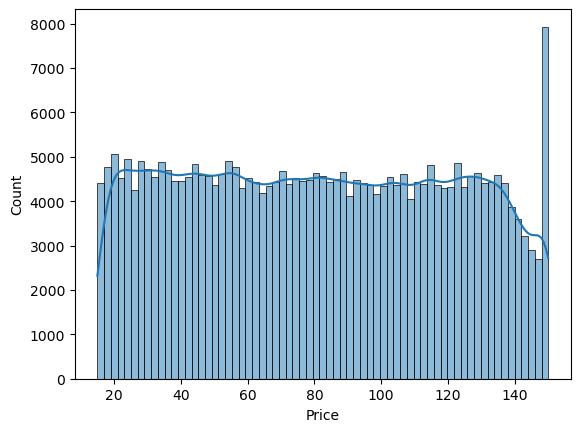

In [86]:
sns.histplot(data['Price'],kde=True)
plt.show()

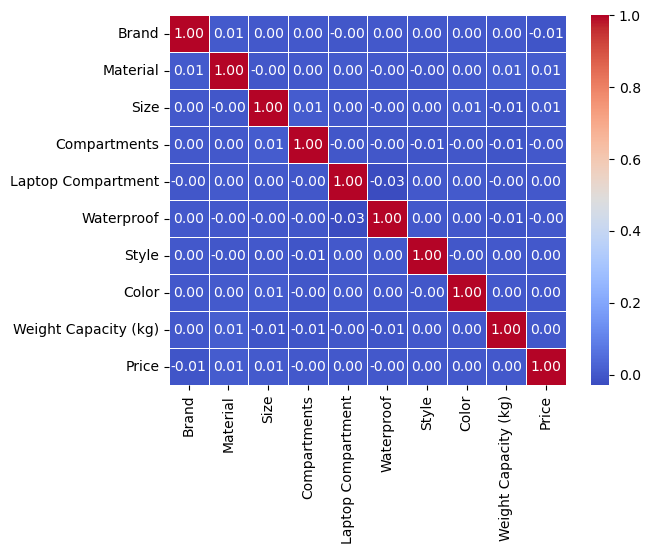

In [87]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

No multicollinearity

Splitting in train and test data

In [88]:
x=data.drop('Price',axis=1)
y=data['Price']

In [89]:
x.shape

(300000, 9)

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [91]:
x_train.size

1809000

In [92]:
x_test.size

891000

Splitting in test and validation set

In [93]:
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [94]:
x_val.size

445500

In [95]:
x_test.size

445500

Trying different regression models

In [96]:
from sklearn.metrics import root_mean_squared_error

In [97]:
def check_val(model):
    y_predict=model.predict(x_val)
    print("Root mean square error for the model: ", root_mean_squared_error(y_val,y_predict))

In [103]:
from sklearn.linear_model import LinearRegression
check_val(LinearRegression().fit(x_train,y_train))

Root mean square error for the model:  38.83703106077086


In [104]:
from sklearn.linear_model import SGDRegressor
check_val(SGDRegressor().fit(x_train,y_train.ravel()))

Root mean square error for the model:  38.850339923246054


In [106]:
from sklearn.linear_model import Ridge
check_val(Ridge().fit(x_train,y_train))

Root mean square error for the model:  38.83703106303471


In [112]:
from sklearn.neighbors import KNeighborsRegressor
check_val(KNeighborsRegressor().fit(x_train,y_train))

Root mean square error for the model:  42.609132346883385


In [113]:
from sklearn.svm import SVR
check_val(SVR().fit(x_train,y_train))

Root mean square error for the model:  38.847289588637764


In [114]:
from sklearn.tree import DecisionTreeRegressor
check_val(DecisionTreeRegressor().fit(x_train,y_train))

Root mean square error for the model:  55.89501881112253


In [115]:
from sklearn.ensemble import AdaBoostRegressor
check_val(AdaBoostRegressor().fit(x_train,y_train))

Root mean square error for the model:  38.82719331072081


In [116]:
from sklearn.ensemble import BaggingRegressor
check_val(BaggingRegressor().fit(x_train,y_train))

Root mean square error for the model:  41.760003936711286


In [117]:
from sklearn.ensemble import ExtraTreesRegressor
check_val(ExtraTreesRegressor().fit(x_train,y_train))

Root mean square error for the model:  42.58940753582835


In [118]:
from sklearn.ensemble import GradientBoostingRegressor
check_val(GradientBoostingRegressor().fit(x_train,y_train))

Root mean square error for the model:  38.82091709658003


In [119]:
from sklearn.ensemble import HistGradientBoostingRegressor
check_val(HistGradientBoostingRegressor().fit(x_train,y_train))

Root mean square error for the model:  38.82605774535946


In [120]:
from sklearn.ensemble import RandomForestRegressor
check_val(RandomForestRegressor().fit(x_train,y_train))

Root mean square error for the model:  40.082222557449796


In [121]:
from xgboost import XGBRFRegressor
check_val(XGBRFRegressor().fit(x_train,y_train))

Root mean square error for the model:  38.82431764628021


In [ ]:
from catboost import CatBoostRegressor
check_val(CatBoostRegressor().fit(x_train,y_train))

In [123]:
from lightgbm import LGBMRegressor
check_val(LGBMRegressor().fit(x_train,y_train))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 201000, number of used features: 9
[LightGBM] [Info] Start training from score 81.463119
Root mean square error for the model:  38.84516256698982


In [97]:
from sklearn.neural_network import MLPRegressor
check_val(MLPRegressor().fit(x_train,y_train))

Root mean square error for the model:  38.84387793418028


In [104]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(9,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Single output neuron for regression
])

# Define RMSE as a metric
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', rmse])

# Train the model
epochs = 100
batch_size = 32
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)




Epoch 1/100


6282/6282 [==============================] - 29s 4ms/step - loss: 1636.5920 - mae: 34.6346 - rmse: 40.0325 - val_loss: 1513.0317 - val_mae: 33.5747 - val_rmse: 38.7733
Epoch 2/100
6282/6282 [==============================] - 23s 4ms/step - loss: 1536.2388 - mae: 33.8925 - rmse: 39.0655 - val_loss: 1517.5499 - val_mae: 33.6128 - val_rmse: 38.8311
Epoch 3/100
6282/6282 [==============================] - 26s 4ms/step - loss: 1534.1169 - mae: 33.8787 - rmse: 39.0373 - val_loss: 1513.3307 - val_mae: 33.5723 - val_rmse: 38.7774
Epoch 4/100
6282/6282 [==============================] - 25s 4ms/step - loss: 1533.7173 - mae: 33.8809 - rmse: 39.0345 - val_loss: 1509.8085 - val_mae: 33.5683 - val_rmse: 38.7342
Epoch 5/100
6282/6282 [==============================] - 25s 4ms/step - loss: 1532.4829 - mae: 33.8650 - rmse: 39.0216 - val_loss: 1519.4099 - val_mae: 33.6070 - val_rmse: 38.8525
Epoch 6/100
6282/6282 [==============================] - 25s 4ms/step - loss: 1532.0630 - mae: 33.

The result are as follows: LinearRegression: 38.83703106077086; SGD: 38.850339923246054; Ridge: 38.83703106303471;KNeighbors: 42.609132346883385; SVR: 38.847289588637764; DecisionTree: 55.89501881112253; AdaBoost: 38.82719331072081; Bagging: 41.760003936711286; ExtraTree: 42.58940753582835; GradientBoosting: 38.82091709658003; HistGradient: 38.82605774535946; RandomForest: 40.082222557449796; XGB: 38.82431764628021; CatBoost:  38.944891868197395; lgbm: 38.84516256698982; MLP:  38.84387793418028; using neural network: 38.7734

Picking top models: Ridge, AdaBoost, GradientBoosting, HistGradient, XGB and neural networks 

Setting best hyperparameters

In [117]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor 
import joblib

For Ridge Regression

In [166]:
alphas = [0.1, 1.0, 10.0, 100.0, 200.0]
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(x_train, y_train)

C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 200.0], store_cv_values=True)

In [167]:
ridge_cv.alpha_

200.0

In [170]:
joblib.dump(ridge_cv,'ridge_model.pkl')

['ridge_model.pkl']

For adaboost

In [174]:
from sklearn.tree import DecisionTreeRegressor
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'learning_rate': np.linspace(0.01, 1, 10),
    'loss': ['linear', 'square', 'exponential'],
    'estimator': [DecisionTreeRegressor(max_depth=d) for d in range(1, 6)]
}


adaboost = AdaBoostRegressor(random_state=42)
random_search = RandomizedSearchCV(adaboost, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'estimator': [DecisionTreeRegressor(max_depth=1),
                                                      DecisionTreeRegressor(max_depth=2),
                                                      DecisionTreeRegressor(max_depth=3),
                                                      DecisionTreeRegressor(max_depth=4),
                                                      DecisionTreeRegressor(max_depth=5)],
                                        'learning_rate': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42)

In [175]:
random_search.best_score_

0.0006058888244468985

In [176]:
random_search.best_estimator_

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.01, loss='square', n_estimators=150,
                  random_state=42)

In [177]:
joblib.dump(random_search.best_estimator_,"adaboost_model.pkl")

['adaboost_model.pkl']

For Gradient Boosting

In [178]:
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'learning_rate': np.linspace(0.01, 1, 10),
    'max_depth': np.arange(1, 11),
    'subsample': np.linspace(0.5, 1.0, 5),
    'min_samples_split': np.arange(2, 11)
}

gbr = GradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(gbr, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'subsample': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
                   random_state=42)

In [179]:
random_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=3,
                          n_estimators=250, random_state=42, subsample=0.5)

In [180]:
joblib.dump(random_search.best_estimator_,"gradientboosting_model.pkl")

['gradientboosting_model.pkl']

For HistGradient 

In [181]:
param_dist = {
    'learning_rate': np.linspace(0.01, 1, 10),
    'max_iter': np.arange(50, 500, 50),
    'max_depth': np.arange(1, 11),
    'min_samples_leaf': np.arange(2, 20),
    'l2_regularization': np.logspace(-4, 1, 10)
}

hgb = HistGradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(hgb, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'l2_regularization': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                                        'learning_rate': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'max_iter': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   random_state=42)

In [182]:
random_search.best_estimator_

HistGradientBoostingRegressor(l2_regularization=0.21544346900318845,
                              learning_rate=0.89, max_depth=1, max_iter=350,
                              min_samples_leaf=2, random_state=42)

In [183]:
joblib.dump(random_search.best_estimator_,'histgradient_model.pkl')

['histgradient_model.pkl']

For XGB

In [184]:
param_dist = {
    'learning_rate': np.linspace(0.01, 1, 10),
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(1, 11),
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'reg_lambda': np.logspace(-4, 1, 10),
    'reg_alpha': np.logspace(-4, 1, 10)
}

xgb = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'reg_alpha': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                                        'reg_lambda': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                                        'subsample': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
                   random_state=42)

In [185]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.875, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [186]:
joblib.dump(random_search.best_estimator_,'xgb_model.pkl')

['xgb_model.pkl']

For catboost

In [118]:
param_dist = {
    'learning_rate': np.linspace(0.01, 1, 10),
    'iterations': np.arange(50, 500, 50),
    'depth': np.arange(1, 11),
    'l2_leaf_reg': np.logspace(-4, 1, 10),
    'border_count': np.arange(32, 256, 32),
    'bagging_temperature': np.linspace(0, 1, 5)
}

catboost = CatBoostRegressor(random_state=42, verbose=0)
random_search = RandomizedSearchCV(catboost, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001D79CCB55D0>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bagging_temperature': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                                        'border_count': array([ 32,  64,  96, 128, 160, 192, 224]),
                                        'depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'iterations': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'l2_leaf_reg': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                                        'learning_rate': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
                   random_state=42)

In [119]:
joblib.dump(random_search.best_estimator_,"catboost_model.pkl")

['catboost_model.pkl']

For light gbm

In [120]:
param_dist = {
    'learning_rate': np.linspace(0.01, 1, 10),
    'n_estimators': np.arange(50, 500, 50),
    'num_leaves': np.arange(10, 150, 10),
    'max_depth': np.arange(-1, 11),
    'min_child_samples': np.arange(5, 50, 5),
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'reg_lambda': np.logspace(-4, 1, 10),
    'reg_alpha': np.logspace(-4, 1, 10)
}


lgbm = LGBMRegressor(random_state=42)
random_search = RandomizedSearchCV(lgbm, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 201000, number of used features: 9
[LightGBM] [Info] Start training from score 81.463119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5  , 0.625, 0.75 , 0.875, 1.   ]),
                                        'learning_rate': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                                        'max_depth': array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_child_samples': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'n_estimators': ar...
                                        'reg_alpha': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                                        'reg_lambda': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                                        'subsample': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
                   random_state=42)

In [121]:
joblib.dump(random_search.best_estimator_,"lgbm_model.pkl")

['lgbm_model.pkl']

Checking For test data

In [106]:
loss, mae, rmse_value = model.evaluate(x_test, y_test, verbose=0)
print(f"Test RMSE: {rmse_value:.4f}")

Test RMSE: 39.0812


In [122]:
ada=joblib.load('adaboost_model.pkl')
ridge=joblib.load('ridge_model.pkl')
xgb=joblib.load('xgb_model.pkl')
grad=joblib.load('gradientboosting_model.pkl')
hist=joblib.load('histgradient_model.pkl')
cat=joblib.load('catboost_model.pkl')
lgbm=joblib.load('lgbm_model.pkl')

In [123]:
def check_test(model):
    y_pred=model.predict(x_test)
    print("RMSE : ",root_mean_squared_error(y_test,y_pred))

In [191]:
check_test(ada)

RMSE :  39.134913115156266


In [192]:
check_test(ridge)

RMSE :  39.147299433952234


In [193]:
check_test(xgb)

RMSE :  39.117445868593514


In [194]:
check_test(grad)

RMSE :  39.11362217740117


In [195]:
check_test(hist)

RMSE :  39.126230160407836


In [124]:
check_test(cat)

RMSE :  39.1122871361823


In [125]:
check_test(lgbm)

RMSE :  39.11380517301748


For unseen test data

In [100]:
test=pd.read_csv('test.csv')

In [101]:
test.head(3)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799


In [102]:
df=test.drop('id',axis=1)

In [103]:
df

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953
...,...,...,...,...,...,...,...,...,...
199995,Adidas,Canvas,Large,2.0,Yes,No,Messenger,Red,7.383498
199996,Nike,Polyester,Small,9.0,No,Yes,Messenger,Pink,6.058394
199997,Jansport,Nylon,Small,9.0,No,Yes,Tote,Green,26.890163
199998,Puma,Nylon,Large,10.0,Yes,No,Tote,Gray,25.769153


In [104]:
df.isnull().sum()

Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64

In [105]:
change_brand(df)
change_color(df)
change_compartments(df)
change_laptop(df)
change_material(df)
change_size(df)
change_style(df)
change_waterproof(df)
change_weight(df)

In [106]:
df

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,4,0,1,2.0,0,0,0,1,0.626846
1,2,1,0,7.0,0,1,2,1,0.342564
2,3,1,2,9.0,0,1,1,3,0.272392
3,3,2,2,1.0,1,0,1,1,0.539081
4,5,2,2,2.0,1,1,0,0,0.196318
...,...,...,...,...,...,...,...,...,...
199995,3,1,2,2.0,1,0,1,2,0.095340
199996,2,3,1,9.0,0,1,1,5,0.042336
199997,0,2,1,9.0,0,1,0,1,0.875607
199998,4,2,2,10.0,1,0,0,4,0.830766


In [131]:
test['Price']=lgbm.predict(df)

In [132]:
test

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147,81.247423
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105,82.412260
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799,81.406193
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036,82.124488
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953,79.018190
...,...,...,...,...,...,...,...,...,...,...,...
199995,499995,Adidas,Canvas,Large,2.0,Yes,No,Messenger,Red,7.383498,79.896168
199996,499996,Nike,Polyester,Small,9.0,No,Yes,Messenger,Pink,6.058394,79.259289
199997,499997,Jansport,Nylon,Small,9.0,No,Yes,Tote,Green,26.890163,83.002279
199998,499998,Puma,Nylon,Large,10.0,Yes,No,Tote,Gray,25.769153,82.150266


In [133]:
res=pd.DataFrame({'id':test['id'],'Price':test['Price']})

In [134]:
res

,id,Price
0,300000,81.247423
1,300001,82.412260
2,300002,81.406193
3,300003,82.124488
4,300004,79.018190
...,...,...
199995,499995,79.896168
199996,499996,79.259289
199997,499997,83.002279
199998,499998,82.150266


In [135]:
res.to_csv('result.csv',index=False)